# About Loan Eligibility Prediction

Dream Housing Finance company deals in all home loans. They have a presence across all urban, semi-urban, and rural areas. Customer-first applies for a home loan after that company validates the customer eligibility for a loan.

# About Implementation

Using the `Logistic Regression` algorithm, I made a clustering by examining the spending of customers with their credit cards.

The explanations of the codes are also written as a comment line in detail, but I will write the operations I have done.

After defining the libraries we use, we read our file. I defined the reading patterns for the colab environment and for the local environment.

To familiarize myself with the dataset, I took a look at the variable names and types.



# About Dataset
The company wants to automate the loan eligibility process (real-time) based on customer detail provided while filling the online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History, and others. To automate this process, they have given a problem to identify the customer's segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

Loan_ID : Unique Loan ID.

Gender : Male/ Female

Married : Applicant married (Y/N)

Dependents : Number of dependents

Education : Applicant Education (Graduate/ Under Graduate)

Self_Employed : Self-employed (Y/N)

ApplicantIncome : Applicant income

CoapplicantIncome : Coapplicant income

LoanAmount -: Loan amount in thousands

Loan_Amount_Term : Term of a loan in months

Credit_History : Credit history meets guidelines

Property_Area : Urban/ Semi-Urban/ Rural

Loan_Status : Loan approved (Y/N)

# Dataset Adjustments


In [1]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import missingno as msno # for visualising missing values
import io #reading files for all systems
from sklearn.preprocessing import LabelEncoder # labelling for multiclass variables
import matplotlib.pyplot as plt # some graphs
import seaborn as sns # helping with some visualization techniques 
from sklearn.linear_model import LogisticRegression # logistic regression algorithm
from sklearn.metrics import accuracy_score # calculation for accuracy


In [2]:
#loading csv file from local to colab
from google.colab import files
uploaded = files.upload()

Saving loan-test.csv to loan-test (2).csv
Saving loan-train.csv to loan-train (2).csv


In [ ]:
#loading csv file from local to colab
loan_test = pd.read_csv(io.BytesIO(uploaded['loan-test.csv']))
loan_train = pd.read_csv(io.BytesIO(uploaded['loan-train.csv']))
loan_train.head()

In [ ]:
#loading csv local
loan_test = pd.read_csv('loan-test.csv')
loan_train = pd.read_csv('loan-train.csv')
customer.head()

In [4]:
loan_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
loan_train.isnull().sum() #checking missing values for train dataset

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
loan_test.isnull().sum() #checking missin values for test dataset

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [7]:
loan_train.shape

(614, 13)

Here we can see that we have 614 rows and 13 column in our train dataset.

# Understanding Data

We are looking for how many features we have anda what are columns' names first. 

In [8]:
loan_train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [9]:
loan_train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

Now we are looking for our numerical variables' statistical values(count, mean, standard deviation (std), min, quartiles and max).

In [10]:
loan_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Instead of the above If we use .info() we can see that we have missing values also. We have 981 entries and 13 columns.

In [11]:
loan_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# EDA (Exploratory Data Analysis)

Getting closer to our dataset..

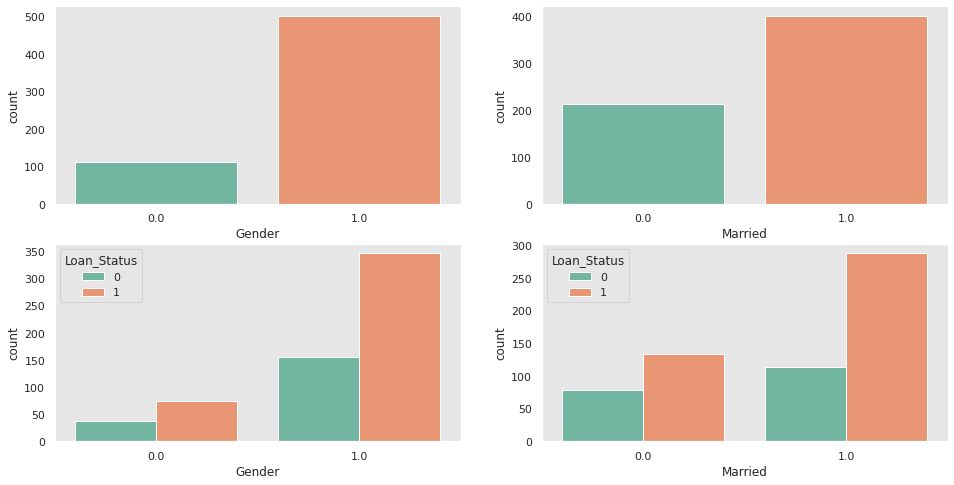

In [42]:
sns.set_style("dark", {"axes.facecolor": ".9"})
plt.figure(figsize = (16,8))
plt.subplot(2,2,1)
sns.countplot(x = 'Gender' , data = loan_train, palette="Set2")
plt.subplot(2,2,2)
sns.countplot(x = 'Married', data= loan_train, palette="Set2")
plt.subplot(2,2,3)
sns.countplot(x = 'Gender', hue= 'Loan_Status', data = loan_train, palette="Set2")
plt.subplot(2,2,4)
sns.countplot(x = 'Married',hue = 'Loan_Status' , data= loan_train, palette="Set2")
plt.show()

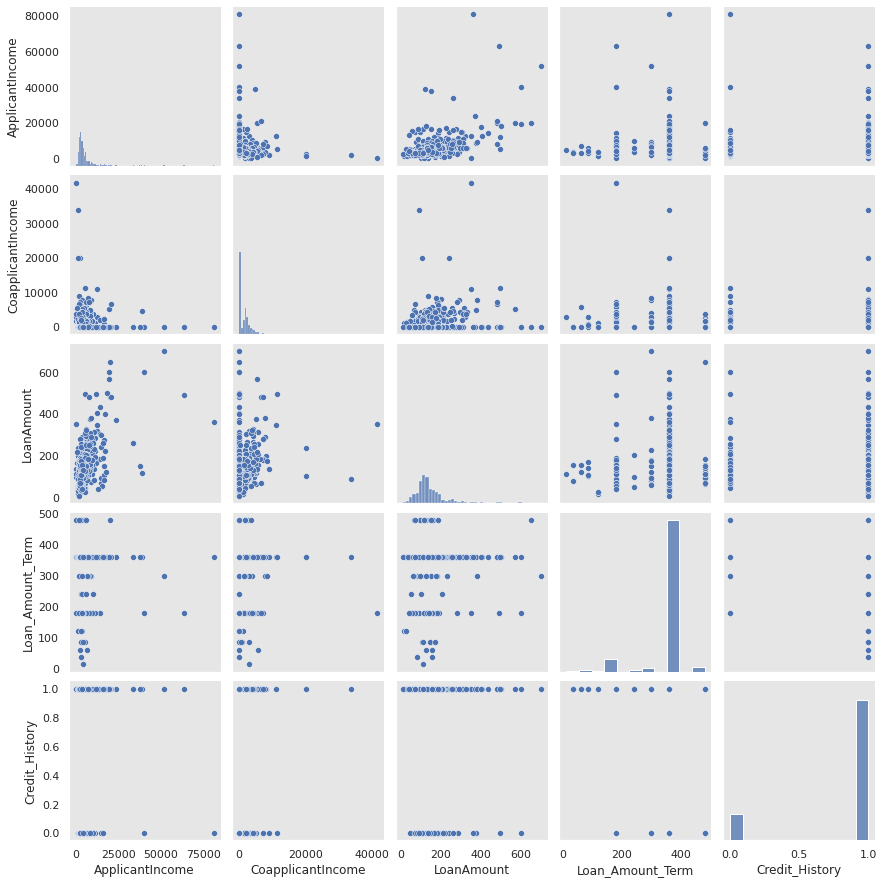

In [14]:
sns.pairplot(loan_train)
plt.show()

Its look like ApplicantIncome and LoanAmount have a linear relationship (or poly?) , and this relationship is make sense cause more income more loan amount can affort .

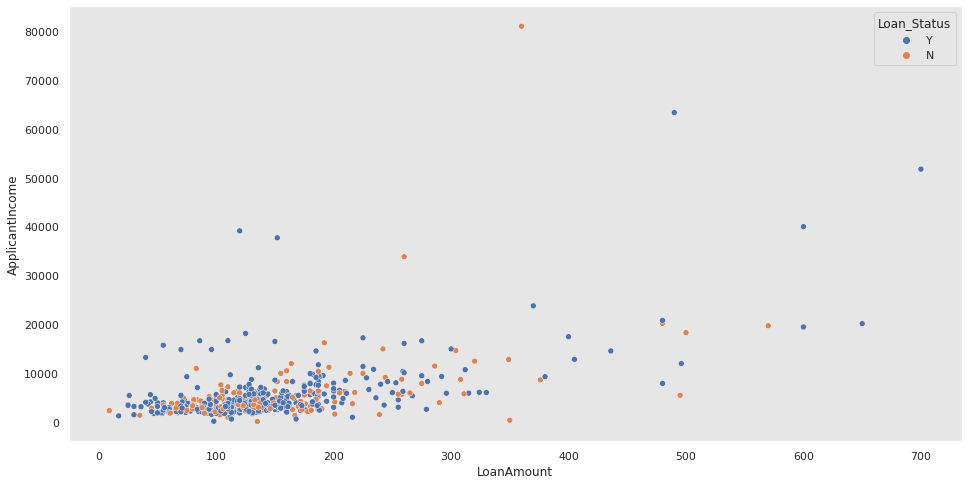

In [15]:
plt.figure(figsize = (16,8))
sns.scatterplot(x = 'LoanAmount' , y = 'ApplicantIncome' , hue = 'Loan_Status', data = loan_train)
plt.show()

And it is look like there is no obvious relationship between these 2 features and Loan_Status. And we are looking for categorical vairables below

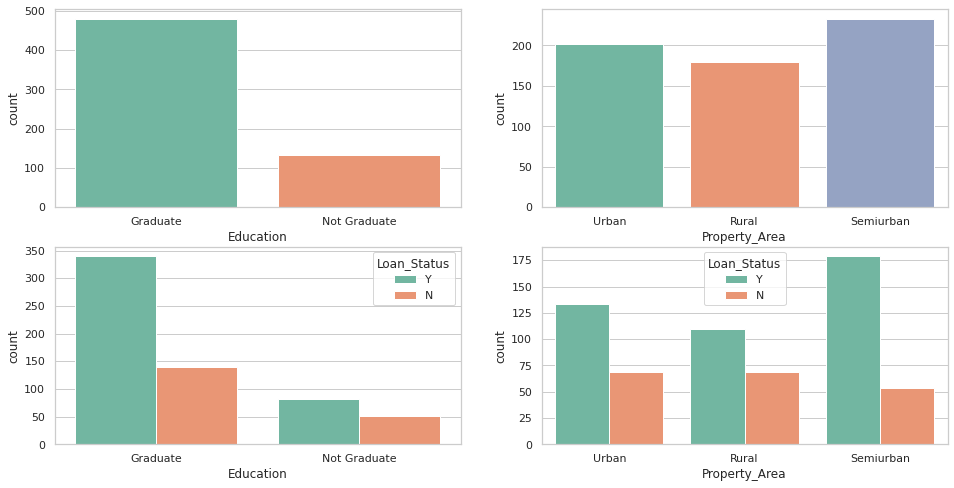

In [16]:
sns.set(style = 'whitegrid')
plt.figure(figsize = (16,8))
plt.subplot(2,2,1)
sns.countplot(x = 'Education' , data = loan_train, palette="Set2")
plt.subplot(2,2,2)
sns.countplot(x = 'Property_Area', data= loan_train, palette="Set2")
plt.subplot(2,2,3)
sns.countplot(x = 'Education', hue= 'Loan_Status', data = loan_train, palette="Set2")
plt.subplot(2,2,4)
sns.countplot(x = 'Property_Area',hue = 'Loan_Status' , data= loan_train, palette="Set2")
plt.show()

In [17]:
#to print the values of columns that are categorical variables
def explore_object_type(loan ,feature_name):

    if loan_train[feature_name].dtype ==  'object':
        print(loan[feature_name].value_counts())

In [18]:
#to repeat for each categorical variable column
for featureName in loan_train.columns:
    if loan_train[featureName].dtype == 'object':
        print('\n"' + str(featureName) + '\'s" Values with count are :')
        explore_object_type(loan_train, str(featureName)) 



"Loan_ID's" Values with count are :
LP002265    1
LP002137    1
LP002778    1
LP002978    1
LP001030    1
           ..
LP002602    1
LP001792    1
LP001841    1
LP001032    1
LP002757    1
Name: Loan_ID, Length: 614, dtype: int64

"Gender's" Values with count are :
Male      489
Female    112
Name: Gender, dtype: int64

"Married's" Values with count are :
Yes    398
No     213
Name: Married, dtype: int64

"Dependents's" Values with count are :
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

"Education's" Values with count are :
Graduate        480
Not Graduate    134
Name: Education, dtype: int64

"Self_Employed's" Values with count are :
No     500
Yes     82
Name: Self_Employed, dtype: int64

"Property_Area's" Values with count are :
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

"Loan_Status's" Values with count are :
Y    422
N    192
Name: Loan_Status, dtype: int64


As we observed above, 5 of our categorical variables have 2 classes, 1 has 3 and 1 has 4 classes. "Loan_ID" seems like not important feature for us. We will see. So we can use one-hot encoding method in the future. But now we have to deal with missing values. We've seen that we have missing values a lot. so it would be wiser to fill with mod,median or mean instead of delete them

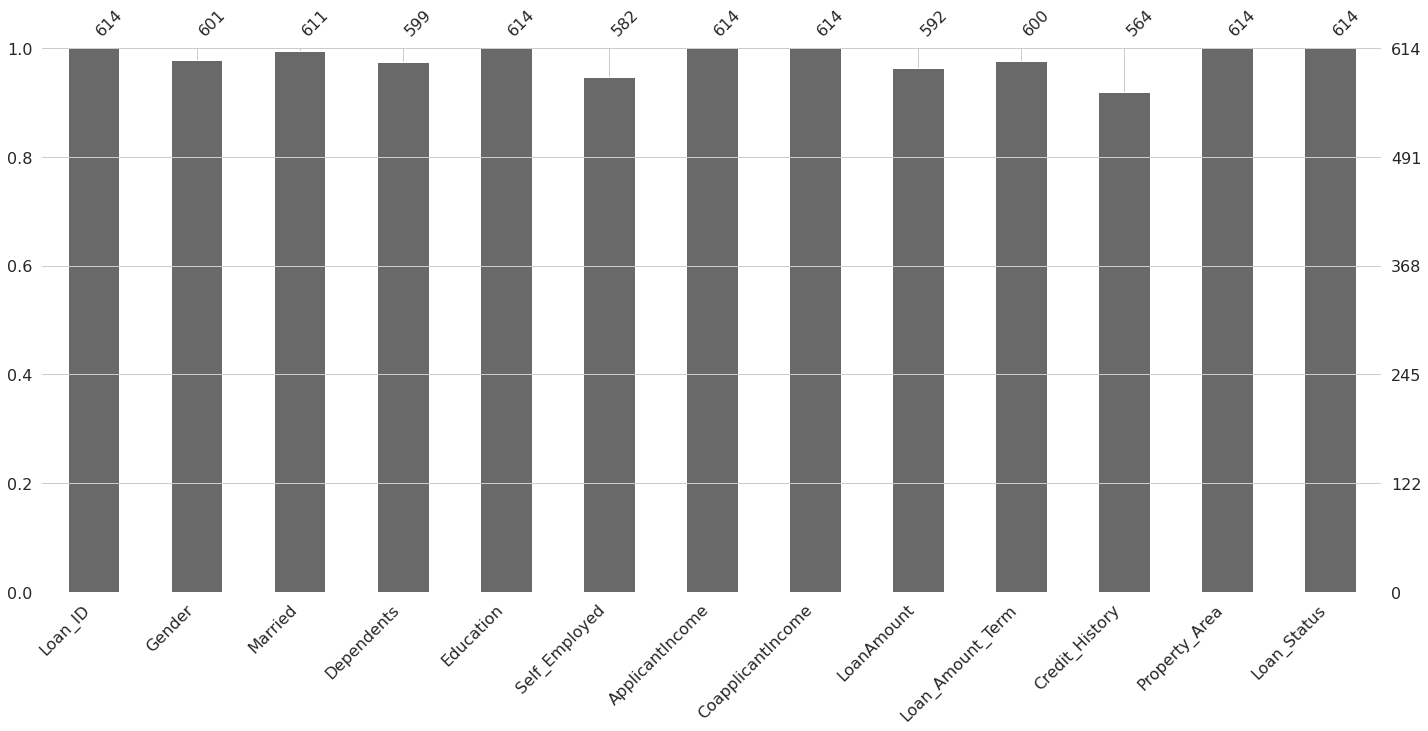

In [19]:
msno.bar(loan_train);

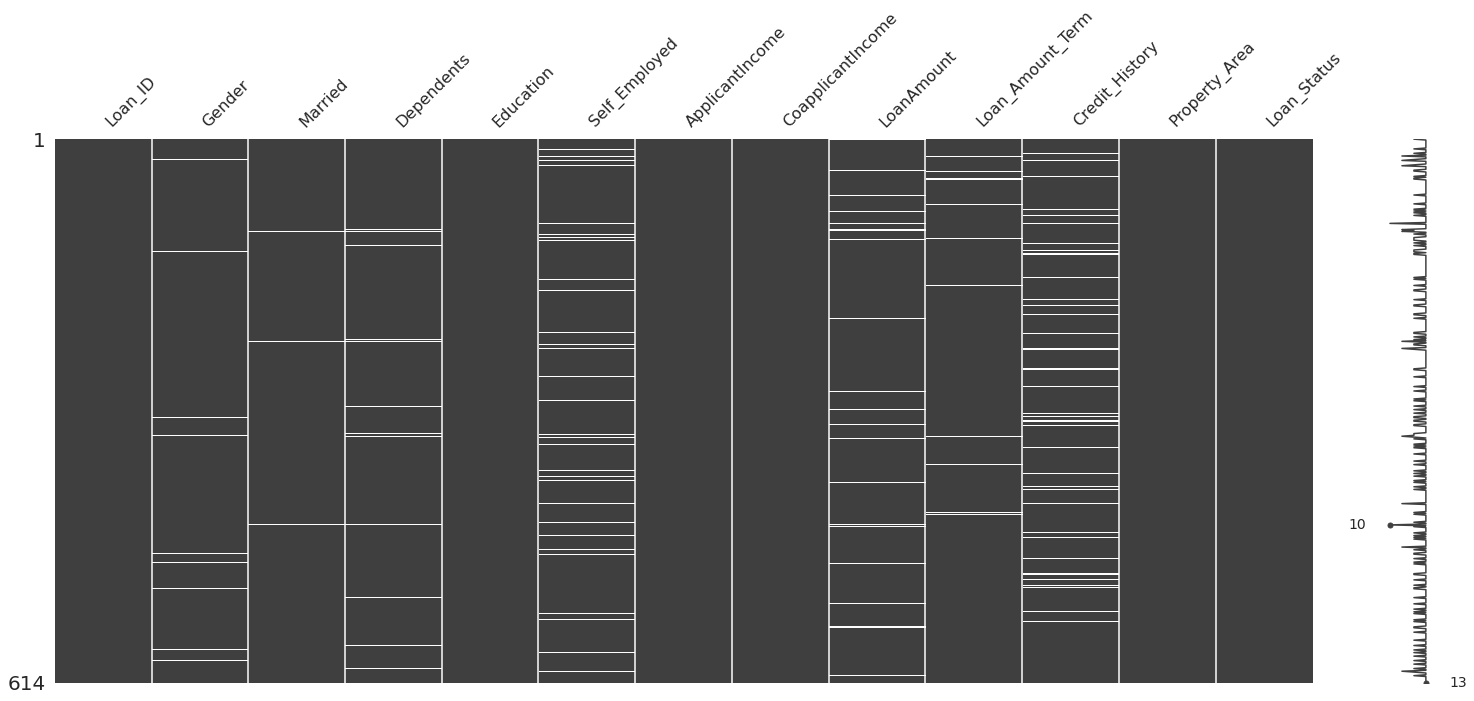

In [20]:
msno.matrix(loan_train);

As we can see here, there are too many columns missing with small amount of null values so we use mean amd mode to replace with NaN values. When we do one-hot encoding, we convert the variables with 2 options to 1 and 0 in order to avoid unnecessary columns. (Yes = 1 N0 = 0). We are doing this for both train and test datasets.

In [21]:
loan_train['Credit_History'].fillna(loan_train['Credit_History'].mode(), inplace=True) # Mode
loan_test['Credit_History'].fillna(loan_test['Credit_History'].mode(), inplace=True) # Mode


loan_train['LoanAmount'].fillna(loan_train['LoanAmount'].mean(), inplace=True) # Mean
loan_test['LoanAmount'].fillna(loan_test['LoanAmount'].mean(), inplace=True) # Mean

In [22]:
loan_train.Loan_Status = loan_train.Loan_Status.replace({"Y": 1, "N" : 0})
#we dont heave Loan_Status column in our test data set

loan_train.Gender = loan_train.Gender.replace({"Male": 1, "Female" : 0})
loan_test.Gender = loan_test.Gender.replace({"Male": 1, "Female" : 0})

loan_train.Married = loan_train.Married.replace({"Yes": 1, "No" : 0})
loan_test.Married = loan_test.Married.replace({"Yes": 1, "No" : 0})

loan_train.Self_Employed = loan_train.Self_Employed.replace({"Yes": 1, "No" : 0})
loan_test.Self_Employed = loan_test.Self_Employed.replace({"Yes": 1, "No" : 0})

In [23]:
loan_train['Gender'].fillna(loan_train['Gender'].mode()[0], inplace=True)
loan_test['Gender'].fillna(loan_test['Gender'].mode()[0], inplace=True)

loan_train['Dependents'].fillna(loan_train['Dependents'].mode()[0], inplace=True)
loan_test['Dependents'].fillna(loan_test['Dependents'].mode()[0], inplace=True)

loan_train['Married'].fillna(loan_train['Married'].mode()[0], inplace=True)
loan_test['Married'].fillna(loan_test['Married'].mode()[0], inplace=True)

loan_train['Credit_History'].fillna(loan_train['Credit_History'].mean(), inplace=True)
loan_test['Credit_History'].fillna(loan_test['Credit_History'].mean(), inplace=True)

Here, Property_Area(3), Dependents(4) and Education(3) has multiple values so now we can use LabelEncoder from sklearn 

In [24]:
feature_col = ['Property_Area','Education', 'Dependents']
le = LabelEncoder()
for col in feature_col:
    loan_train[col] = le.fit_transform(loan_train[col])
    loan_test[col] = le.fit_transform(loan_test[col])

As you see  we have all numerical variables below.

In [25]:
loan_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0,0,0.0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1.0,1.0,1,0,0.0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1.0,1.0,0,0,1.0,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1.0,1.0,0,1,0.0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1.0,0.0,0,0,0.0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0.0,0.0,0,0,0.0,2900,0.0,71.000000,360.0,1.0,0,1
610,LP002979,1.0,1.0,3,0,0.0,4106,0.0,40.000000,180.0,1.0,0,1
611,LP002983,1.0,1.0,1,0,0.0,8072,240.0,253.000000,360.0,1.0,2,1
612,LP002984,1.0,1.0,2,0,0.0,7583,0.0,187.000000,360.0,1.0,2,1


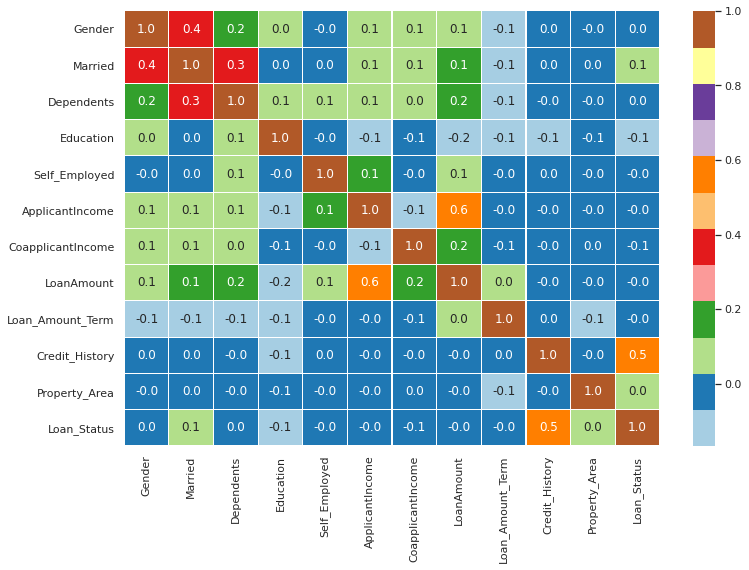

In [26]:
plt.figure(figsize=(12,8))
sns.heatmap(loan_train.corr(), cmap='Paired', annot=True, fmt='.1f', linewidths=.1)
plt.show()

There is no serious correlation.

# MODEL

Before fitting the model, We need to decide how many feature are available for testing and training, then after complete this step. fitt the model. 

Currently, we are using Credit_History', 'Education', 'Gender features for training so let's create train and test variables

In [28]:
logistic_model = LogisticRegression()

In [31]:
train_features = ['Credit_History', 'Education', 'Gender']

x_train = loan_train[train_features].values
y_train = loan_train['Loan_Status'].values

x_test = loan_test[train_features].values

In [32]:
logistic_model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Check the coefficeints of the trained model

In [33]:
print('Coefficient of model :', logistic_model.coef_)

Coefficient of model : [[ 3.316164   -0.3059193   0.09398266]]


Check the intercept of the model

In [34]:
print('Intercept of model',logistic_model.intercept_)

Intercept of model [-1.98307795]


Accuray Score on train dataset


In [35]:
score = logistic_model.score(x_train, y_train)
print('accuracy_score overall :', score)
print('accuracy_score percent :', round(score*100,2))

accuracy_score overall : 0.8094462540716613
accuracy_score percent : 80.94


Predict the model for testing data

In [39]:
predicted = logistic_model.predict(x_test)
predicted

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [37]:
predict_test = logistic_model.predict(x_test)
print('Target on test data',predict_test) 

Target on test data [1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1]
